In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('weather_data.csv')
df.head()

,Date Time,T (degC),p (mbar)
0,01.01.2009 00:10:00,-8.02,996.52
1,01.01.2009 00:20:00,-8.41,996.57
2,01.01.2009 00:30:00,-8.51,996.53
3,01.01.2009 00:40:00,-8.31,996.51
4,01.01.2009 00:50:00,-8.27,996.51


In [3]:
df = df[5::6]
df

,Date Time,T (degC),p (mbar)
5,01.01.2009 01:00:00,-8.05,996.50
11,01.01.2009 02:00:00,-8.88,996.62
17,01.01.2009 03:00:00,-8.81,996.84
23,01.01.2009 04:00:00,-9.05,996.99
29,01.01.2009 05:00:00,-9.63,997.46
...,...,...,...
420521,31.12.2016 19:10:00,-0.98,1002.18
420527,31.12.2016 20:10:00,-1.40,1001.40
420533,31.12.2016 21:10:00,-2.75,1001.19
420539,31.12.2016 22:10:00,-2.89,1000.65


In [4]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.head()

,Date Time,T (degC),p (mbar)
Date Time,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,-8.05,996.50
2009-01-01 02:00:00,01.01.2009 02:00:00,-8.88,996.62
2009-01-01 03:00:00,01.01.2009 03:00:00,-8.81,996.84
2009-01-01 04:00:00,01.01.2009 04:00:00,-9.05,996.99
2009-01-01 05:00:00,01.01.2009 05:00:00,-9.63,997.46


<Axes: xlabel='Date Time'>

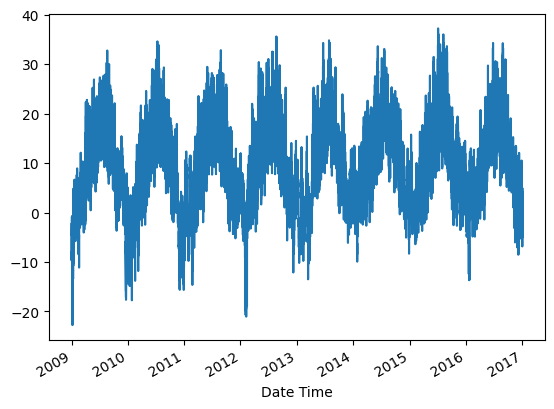

In [5]:
temp = df['T (degC)']
temp.plot()

In [7]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [8]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((70086, 5, 1), (70086,))

In [10]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [11]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [12]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [14]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10,callbacks=[cp1])

Epoch 1/10

1853/1875 [============================>.] - ETA: 0s - loss: 37.4827 - root_mean_squared_error: 6.1223INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 10s 4ms/step - loss: 37.1021 - root_mean_squared_error: 6.0912 - val_loss: 1.4925 - val_root_mean_squared_error: 1.2217
Epoch 2/10
1871/1875 [============================>.] - ETA: 0s - loss: 2.7291 - root_mean_squared_error: 1.6520INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 6s 3ms/step - loss: 2.7257 - root_mean_squared_error: 1.6510 - val_loss: 0.6442 - val_root_mean_squared_error: 0.8026
Epoch 3/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.9899 - root_mean_squared_error: 0.9950INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.9889 - root_mean_squared_error: 0.9944 - val_loss: 0.5416 - val_root_mean_squared_error: 0.7359
Epoch 4/10
1857/1875 [============================>.] - ETA: 0s - loss: 0.7440 - root_mean_squared_error: 0.8626INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 6s 3ms/step - loss: 0.7436 - root_mean_squared_error: 0.8624 - val_loss: 0.5196 - val_root_mean_squared_error: 0.7209
Epoch 5/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.6862 - root_mean_squared_error: 0.8284INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 6s 3ms/step - loss: 0.6865 - root_mean_squared_error: 0.8285 - val_loss: 0.5032 - val_root_mean_squared_error: 0.7094
Epoch 6/10
1859/1875 [============================>.] - ETA: 0s - loss: 0.6686 - root_mean_squared_error: 0.8177INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6695 - root_mean_squared_error: 0.8182 - val_loss: 0.4947 - val_root_mean_squared_error: 0.7034
Epoch 7/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.6603 - root_mean_squared_error: 0.8126INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6604 - root_mean_squared_error: 0.8127 - val_loss: 0.4935 - val_root_mean_squared_error: 0.7025
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6547 - root_mean_squared_error: 0.8092 - val_loss: 0.4972 - val_root_mean_squared_error: 0.7051
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6501 - root_mean_squared_error: 0.8063 - val_loss: 0.4939 - val_root_mean_squared_error: 0.7028
Epoch 10/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.6471 - root_mean_squared_error: 0.8044INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6472 - root_mean_squared_error: 0.8045 - val_loss: 0.4921 - val_root_mean_squared_error: 0.7015


In [15]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [16]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions,'Actuals': y_train1})
train_results

1875/1875 [==============================] - 3s 1ms/step


,Train Predictions,Actuals
0,-9.816041,-9.67
1,-9.668268,-9.17
2,-8.805813,-8.10
3,-7.332181,-7.66
4,-7.192804,-7.04
...,...,...
59995,6.049597,6.07
59996,7.191134,9.88
59997,12.412940,13.53
59998,16.071909,15.43


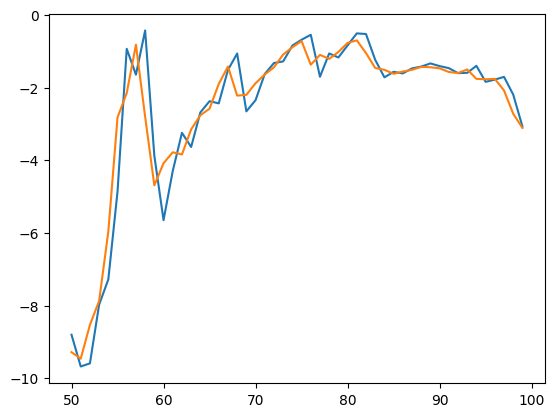

In [17]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100]) 

In [18]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals': y_val1})
val_results

157/157 [==============================] - 1s 1ms/step


,Val Predictions,Actuals
0,15.418401,14.02
1,13.266715,13.67
2,13.093549,12.27
3,11.539424,11.19
4,10.457267,10.85
...,...,...
4995,17.288239,18.27
4996,17.339136,17.85
4997,17.157393,16.65
4998,15.844723,15.85


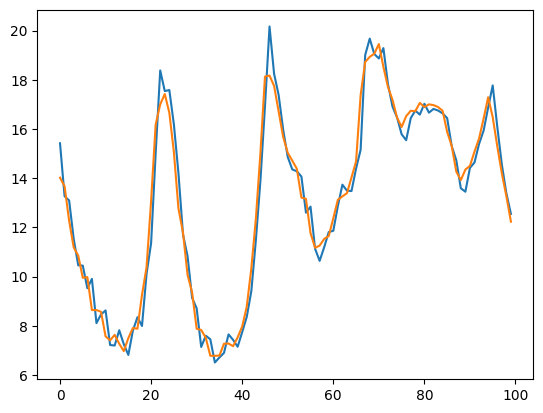

In [19]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [20]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions,'Actuals': y_test1})
test_results

159/159 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,14.408244,13.99
1,13.270988,13.46
2,12.907039,12.93
3,12.517680,12.43
4,12.086379,12.17
...,...,...
5081,-1.186980,-0.98
5082,-1.384359,-1.40
5083,-1.626366,-2.75
5084,-3.290255,-2.89


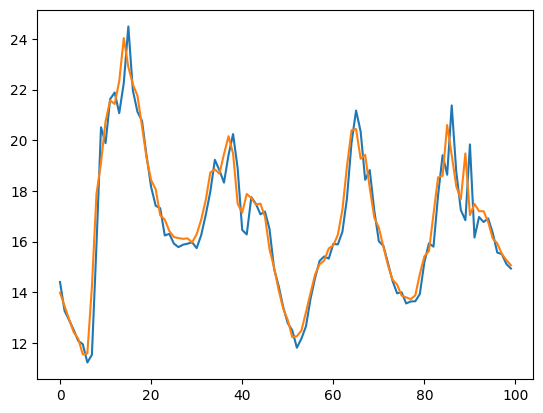

In [21]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [22]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions': predictions, 'Actuals': y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    return df, mse(y, predictions)

159/159 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0       14.408244    13.99
 1       13.270988    13.46
 2       12.907039    12.93
 3       12.517680    12.43
 4       12.086379    12.17
 ...           ...      ...
 5081    -1.186980    -0.98
 5082    -1.384359    -1.40
 5083    -1.626366    -2.75
 5084    -3.290255    -2.89
 5085    -3.169280    -3.93
 
 [5086 rows x 2 columns],
 0.6326747697228082)

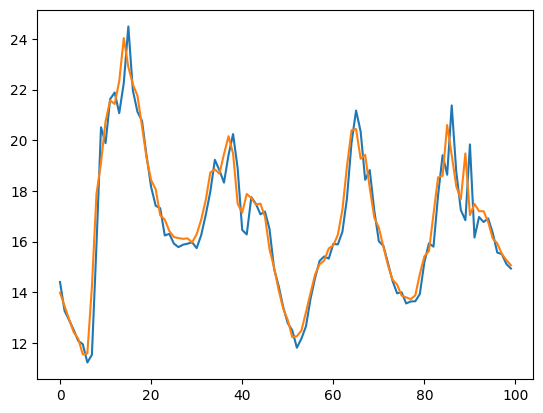

In [23]:
plot_predictions1(model1, X_test1, y_test1)

In [24]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [25]:
day = 60*60*24
year = 365.2425*day
temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [26]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [27]:
def df_to_X_y2(df, window_size=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [28]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape,y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [29]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
    return X

In [30]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [31]:
model2 = Sequential()
model2.add(InputLayer((6, 5)))
model2.add(LSTM(64))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [33]:
model2.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10,callbacks=[cp2])

Epoch 1/10
1860/1875 [============================>.] - ETA: 0s - loss: 30.5433 - root_mean_squared_error: 5.5266INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 9s 4ms/step - loss: 30.3687 - root_mean_squared_error: 5.5108 - val_loss: 4.4755 - val_root_mean_squared_error: 2.1155
Epoch 2/10
1860/1875 [============================>.] - ETA: 0s - loss: 5.7761 - root_mean_squared_error: 2.4033INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 6s 3ms/step - loss: 5.7606 - root_mean_squared_error: 2.4001 - val_loss: 2.3012 - val_root_mean_squared_error: 1.5170
Epoch 3/10
1861/1875 [============================>.] - ETA: 0s - loss: 2.1457 - root_mean_squared_error: 1.4648INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 2.1420 - root_mean_squared_error: 1.4636 - val_loss: 1.1032 - val_root_mean_squared_error: 1.0503
Epoch 4/10
1869/1875 [============================>.] - ETA: 0s - loss: 1.0997 - root_mean_squared_error: 1.0487INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 6s 3ms/step - loss: 1.0985 - root_mean_squared_error: 1.0481 - val_loss: 0.7492 - val_root_mean_squared_error: 0.8655
Epoch 5/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.8028 - root_mean_squared_error: 0.8960INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.8027 - root_mean_squared_error: 0.8959 - val_loss: 0.5939 - val_root_mean_squared_error: 0.7706
Epoch 6/10
1853/1875 [============================>.] - ETA: 0s - loss: 0.6557 - root_mean_squared_error: 0.8097INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 6s 3ms/step - loss: 0.6551 - root_mean_squared_error: 0.8094 - val_loss: 0.4856 - val_root_mean_squared_error: 0.6968
Epoch 7/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.5801 - root_mean_squared_error: 0.7616INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 6s 3ms/step - loss: 0.5798 - root_mean_squared_error: 0.7614 - val_loss: 0.4497 - val_root_mean_squared_error: 0.6706
Epoch 8/10
1859/1875 [============================>.] - ETA: 0s - loss: 0.5488 - root_mean_squared_error: 0.7408INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.5484 - root_mean_squared_error: 0.7406 - val_loss: 0.4246 - val_root_mean_squared_error: 0.6516
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5356 - root_mean_squared_error: 0.7319 - val_loss: 0.4273 - val_root_mean_squared_error: 0.6537
Epoch 10/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.5290 - root_mean_squared_error: 0.7273INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.5284 - root_mean_squared_error: 0.7269 - val_loss: 0.4096 - val_root_mean_squared_error: 0.6400


159/159 [==============================] - 1s 1ms/step


(      Predictions  Actuals
 0       13.215327    13.46
 1       12.813623    12.93
 2       12.404302    12.43
 3       12.095811    12.17
 4       12.197983    11.55
 ...           ...      ...
 5080    -0.990600    -0.98
 5081    -1.416094    -1.40
 5082    -1.708018    -2.75
 5083    -3.043717    -2.89
 5084    -3.187551    -3.93
 
 [5085 rows x 2 columns],
 0.47668230422199065)

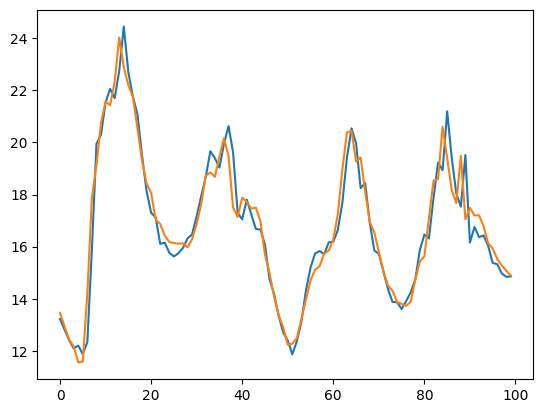

In [34]:
plot_predictions1(model2, X2_test, y2_test)

In [35]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [36]:
def df_to_X_y3(df, window_size=7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
        y.append(label)
    return np.array(X), np.array(y)

In [37]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [38]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape,y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [39]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])
temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])
def preprocess3(X):
    X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
    X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3
def preprocess_output3(y):
    y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
    y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
    return y

In [40]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [41]:
model3 = Sequential()
model3.add(InputLayer((7, 6)))
model3.add(LSTM(64))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(2, activation='linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [43]:
model3.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10,callbacks=[cp3])

Epoch 1/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.1551 - root_mean_squared_error: 0.3939INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 11s 5ms/step - loss: 0.1549 - root_mean_squared_error: 0.3935 - val_loss: 0.0302 - val_root_mean_squared_error: 0.1738
Epoch 2/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0231 - root_mean_squared_error: 0.1519INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0230 - root_mean_squared_error: 0.1517 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1199
Epoch 3/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0111 - root_mean_squared_error: 0.1055INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0111 - root_mean_squared_error: 0.1055 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0843
Epoch 4/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.0866INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0075 - root_mean_squared_error: 0.0866 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0765
Epoch 5/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.0796INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0063 - root_mean_squared_error: 0.0795 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0686
Epoch 6/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0754INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0057 - root_mean_squared_error: 0.0753 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0657
Epoch 7/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0729INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0053 - root_mean_squared_error: 0.0729 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0640
Epoch 8/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0716INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0051 - root_mean_squared_error: 0.0715 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0623
Epoch 9/10
1855/1875 [============================>.] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0710INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 7s 3ms/step - loss: 0.0050 - root_mean_squared_error: 0.0709 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0617
Epoch 10/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0705INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0050 - root_mean_squared_error: 0.0705 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0611


In [44]:
def plot_predictions2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
    p_actuals, temp_actuals = y[:, 0], y[:, 1]
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,'Temperature Actuals':temp_actuals,'Pressure Predictions': p_preds,'Pressure Actuals': p_actuals})
    plt.plot(df['Temperature Predictions'][start:end], label='TemperaturePredictions')
    plt.plot(df['Temperature Actuals'][start:end], label='Temperature Actuals')
    plt.plot(df['Pressure Predictions'][start:end], label='Pressure Predictions')
    plt.plot(df['Pressure Actuals'][start:end], label='Pressure Actuals')
    return df[start:end]

159/159 [==============================] - 1s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.415071,0.412451,-0.790123,-0.793439
1,0.374445,0.353683,-0.779094,-0.763123
2,0.338231,0.323123,-0.744874,-0.721893
3,0.343736,0.250251,-0.691566,-0.652773
4,0.295073,0.254952,-0.603177,-0.652773
...,...,...,...,...
95,0.700476,0.716869,-0.412974,-0.416310
96,0.664821,0.687485,-0.412819,-0.399333
97,0.652721,0.663978,-0.395889,-0.399333
98,0.659935,0.641646,-0.386790,-0.400546


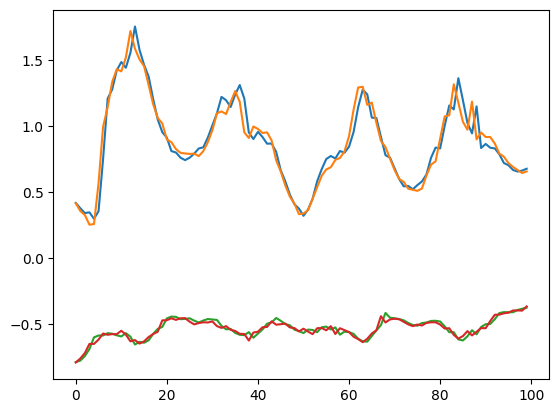

In [45]:
plot_predictions2(model3, X3_test, y3_test)

In [46]:
def postprocess_temp(arr):
    arr = (arr * temp_training_std3) + temp_training_mean3
    return arr
def postprocess_p(arr):
    arr = (arr * p_training_std3) + p_training_mean3
    return arr

159/159 [==============================] - 0s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.952291,12.93,982.457397,982.43
1,12.606650,12.43,982.548340,982.68
2,12.298539,12.17,982.830505,983.02
3,12.345378,11.55,983.270142,983.59
4,11.931351,11.59,983.999023,983.59
...,...,...,...,...
95,15.380522,15.52,985.567566,985.54
96,15.077170,15.27,985.568848,985.68
97,14.974221,15.07,985.708435,985.68
98,15.035604,14.88,985.783447,985.67


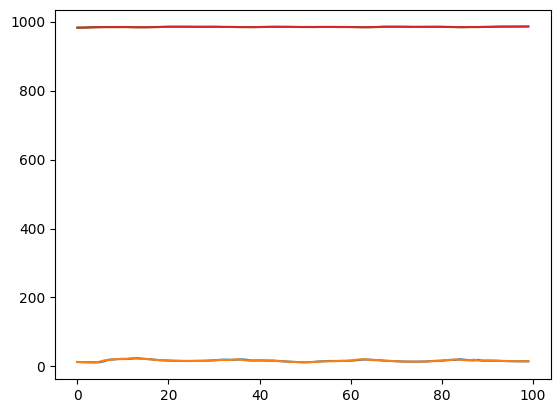

In [47]:
def plot_predictions2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds, temp_preds = postprocess_p(predictions[:, 0]),postprocess_temp(predictions[:, 1])
    p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,'Temperature Actuals': temp_actuals,'Pressure Predictions': p_preds,'Pressure Actuals': p_actuals})
    plt.plot(df['Temperature Predictions'][start:end], label='TemperaturePredictions')
    plt.plot(df['Temperature Actuals'][start:end], label='Temperature Actuals')
    plt.plot(df['Pressure Predictions'][start:end], label='PressurePredictions')
    plt.plot(df['Pressure Actuals'][start:end], label='Pressure Actuals')
    return df[start:end]
post_processed_df = plot_predictions2(model3, X3_test, y3_test)
post_processed_df

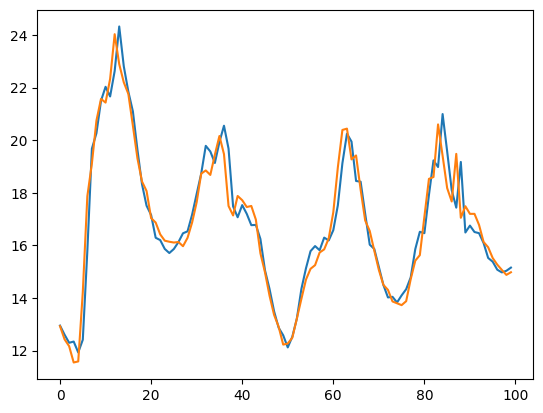

In [48]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end],label='Temperature Predictions')
plt.plot(post_processed_df['Temperature Actuals'][start:end],label='Temperature Actuals')

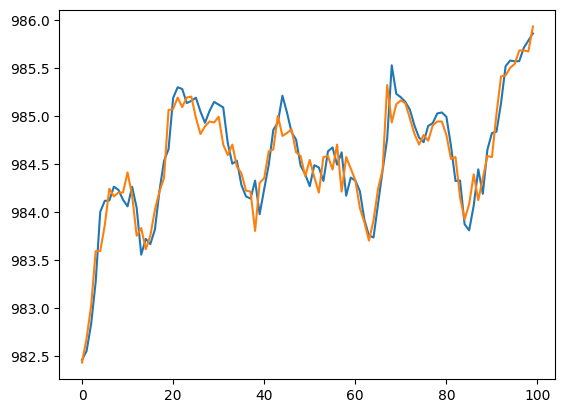

In [49]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])